<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-веществ-на-различных-этапах" data-toc-modified-id="Изменение-концентрации-веществ-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации веществ на различных этапах</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Распределение-по-размерам-гранул-сырья-на-обучающей-и-тестовой-моделях" data-toc-modified-id="Распределение-по-размерам-гранул-сырья-на-обучающей-и-тестовой-моделях-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение по размерам гранул сырья на обучающей и тестовой моделях</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-суммарной-концентрации-на-разных-этапах" data-toc-modified-id="Исследование-суммарной-концентрации-на-разных-этапах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации на разных этапах</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-расчета-итоговой-sMAPE" data-toc-modified-id="Функция-для-расчета-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для расчета итоговой sMAPE</a></span></li><li><span><a href="#Обучение-и-сравнение-моделей" data-toc-modified-id="Обучение-и-сравнение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение и сравнение моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Подготовка прототипа модели для металлообрабатывающего предприятия

Необходимо построить модель для предсказания коэффициента восстановления золота из золотосодержащей руды.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [4]:
display(data_train.head(10))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [6]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [7]:
data_train['Recovery'] = 100*(data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au']-data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))

In [8]:
print(data_train['Recovery'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: Recovery, Length: 16860, dtype: float64


In [9]:
print(data_train['rougher.output.recovery'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64


In [10]:
print(data_train.loc[:,['Recovery', 'rougher.output.recovery']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
Recovery                   14577 non-null float64
rougher.output.recovery    14287 non-null float64
dtypes: float64(2)
memory usage: 263.6 KB
None


In [11]:
data_a = data_train.loc[:,['Recovery', 'rougher.output.recovery']].dropna()
print(data_a.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 2 columns):
Recovery                   14287 non-null float64
rougher.output.recovery    14287 non-null float64
dtypes: float64(2)
memory usage: 334.9 KB
None


In [12]:
print('MSE для расчетного и заданного значения эффетивности обогащения:', mean_absolute_error(data_a['Recovery'], data_a['rougher.output.recovery']))

MSE для расчетного и заданного значения эффетивности обогащения: 1.0898633667227423e-14


### Вывод
Представленные данные были изучены. Была рассчитана эффективность обогащения на этапе флотации. Разница между ними близка к нулю и можно списать ее на погрешность, следовательно в данных данный параметр рассчитан правильно. В тестовой выборке недоступны параметры продукта, т.к. их можно получить только после самого анализа продукта. 

## Анализ данных

### Изменение концентрации веществ на различных этапах

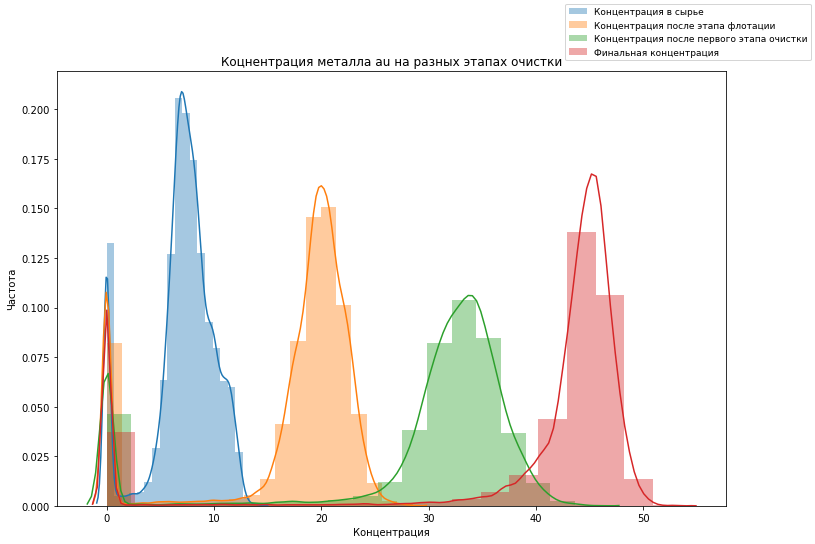

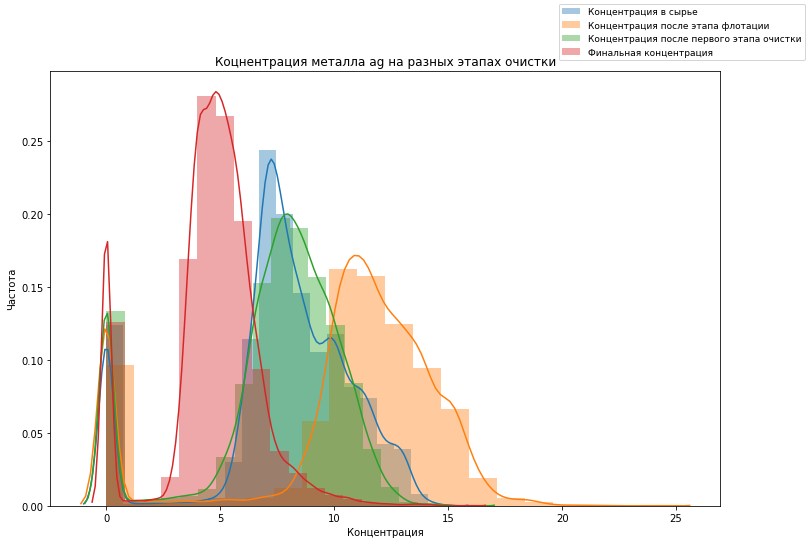

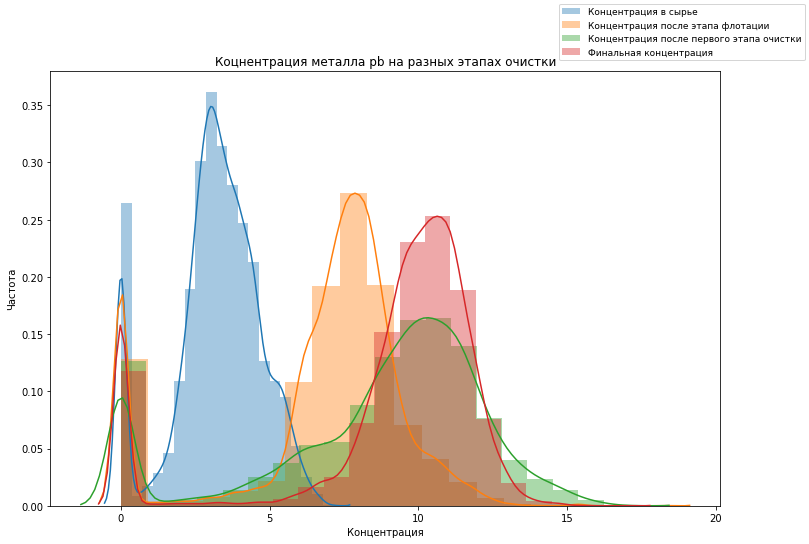

In [13]:
for i in ['au', 'ag', 'pb']:
    fig = plt.figure(figsize=(12,8))
    sns.distplot(data_train[f'rougher.input.feed_{i}'], bins = 20)
    sns.distplot(data_train[f'rougher.output.concentrate_{i}'], bins = 20)
    sns.distplot(data_train[f'primary_cleaner.output.concentrate_{i}'], bins = 20)
    sns.distplot(data_train[f'final.output.concentrate_{i}'], bins = 20)
    fig.legend(labels=['Концентрация в сырье','Концентрация после этапа флотации','Концентрация после первого этапа очистки','Финальная концентрация'], loc = 1, fontsize=9)
    plt.title(f'Коцнентрация металла {i} на разных этапах очистки')
    plt.xlabel('Концентрация')
    plt.ylabel('Частота')
    plt.show()

#### Вывод
По рассмотрению распределений виден рост содержания золота в сплаве, что соответствует действительности, т.к. все действия именно для этого и проводятся. При этом видно повышение концентраций серебра и свинца после этапа флотации, во время очистки концентрация серебра снижается, а концентрация свинца повышается. Так же можно заметить, что часть значений равна нулю  и выпадает из распределения. В дальнейшем данные значения будут удалены.

### Распределение по размерам гранул сырья на обучающей и тестовой моделях

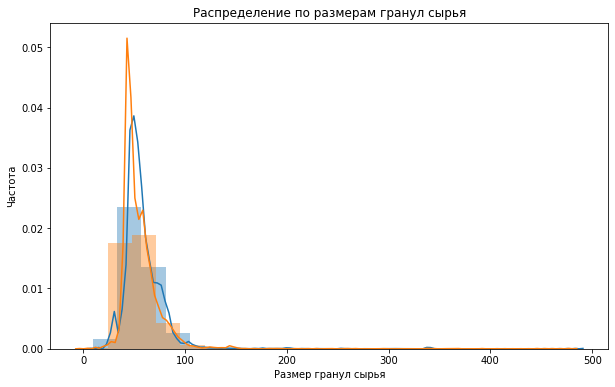

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(data_train['rougher.input.feed_size'], bins = 20)
sns.distplot(data_test['rougher.input.feed_size'], bins = 20)
plt.xlabel('Размер гранул сырья')
plt.ylabel('Частота')
plt.title('Распределение по размерам гранул сырья')
plt.show()


#### Вывод
При анализе распределений по размерам гранул видно, что распределения стремятся к нормальному распределению, а также среднее значения для них близки друг к другу, следовательно, можно сделать вывод о том, что имеется возможность использовать модель, основанную на тренировочной выборке.

### Исследование суммарной концентрации на разных этапах

In [15]:
data_train['rougher_input_feed_sum'] = data_train['rougher.input.feed_ag']+data_train['rougher.input.feed_au']+data_train['rougher.input.feed_pb']+data_train['rougher.input.feed_sol']

In [16]:
data_train['rougher_output_concentrate_sum'] = data_train['rougher.output.concentrate_ag']+data_train['rougher.output.concentrate_au']+data_train['rougher.output.concentrate_pb']+data_train['rougher.output.concentrate_sol']

In [17]:
data_train['final_output_concentrate_sum'] = data_train['final.output.concentrate_ag']+data_train['final.output.concentrate_au']+data_train['final.output.concentrate_pb']+data_train['final.output.concentrate_sol']

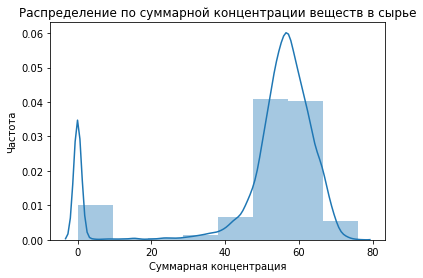

In [18]:
sns.distplot(data_train['rougher_input_feed_sum'], bins = 8)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')
plt.title('Распределение по суммарной концентрации веществ в сырье')
plt.show()

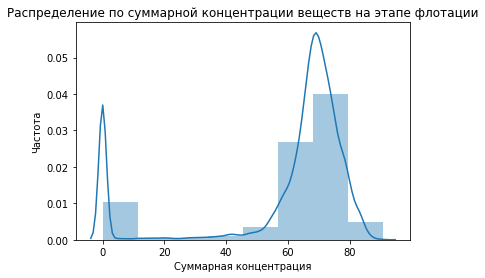

In [19]:
sns.distplot(data_train['rougher_output_concentrate_sum'], bins = 8)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')
plt.title('Распределение по суммарной концентрации веществ на этапе флотации')
plt.show()

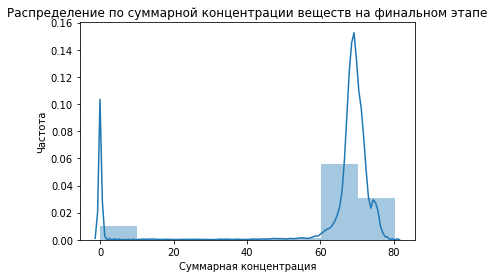

In [20]:
sns.distplot(data_train['final_output_concentrate_sum'], bins = 8)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')
plt.title('Распределение по суммарной концентрации веществ на финальном этапе')
plt.show()

In [21]:
data_train = data_train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'])
data_train = data_train.query('final_output_concentrate_sum > 0.1 and rougher_input_feed_sum >0.1 and rougher_output_concentrate_sum > 0.1')

In [22]:
data_train = data_train.fillna(method='ffill')

In [23]:
data_test = data_test.fillna(method = 'ffill')

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13402 entries, 0 to 16859
Data columns (total 91 columns):
date                                                  13402 non-null object
final.output.concentrate_ag                           13402 non-null float64
final.output.concentrate_pb                           13402 non-null float64
final.output.concentrate_sol                          13402 non-null float64
final.output.concentrate_au                           13402 non-null float64
final.output.recovery                                 13402 non-null float64
final.output.tail_ag                                  13402 non-null float64
final.output.tail_pb                                  13402 non-null float64
final.output.tail_sol                                 13402 non-null float64
final.output.tail_au                                  13402 non-null float64
primary_cleaner.input.sulfate                         13402 non-null float64
primary_cleaner.input.depressant             

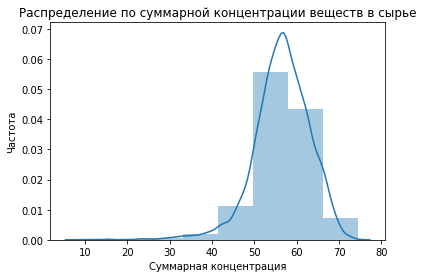

In [25]:
sns.distplot(data_train['rougher_input_feed_sum'], bins = 8)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')
plt.title('Распределение по суммарной концентрации веществ в сырье')
plt.show()

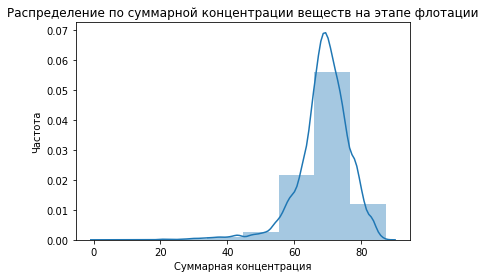

In [26]:
sns.distplot(data_train['rougher_output_concentrate_sum'], bins = 8)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')
plt.title('Распределение по суммарной концентрации веществ на этапе флотации')
plt.show()

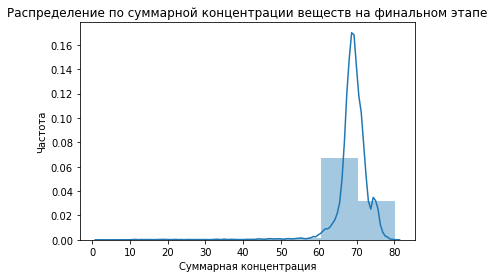

In [27]:
sns.distplot(data_train['final_output_concentrate_sum'], bins = 8)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')
plt.title('Распределение по суммарной концентрации веществ на финальном этапе')
plt.show()

#### Вывод
При рассмотрении суммарных распределений концентраний веществ, можно заметить большое количество околонулевых значений, т.к. такое весьма маловероятно наиболее верным будет удалить данные значений, т.к. их наличие может ухудшить качество модели. Также проведена окончательная обработка с заполнением пропуском методом ffil, т.к. в условии было указано что соседние значения близки друг к другу.

## Модель

In [28]:
columns = data_test.columns
data_train_2 = data_train[columns]# Убираем лишние столбцы на данном этапе, т.к. они были нужны на прошлых

### Функция для расчета итоговой sMAPE

In [29]:
def sMAPE(target, predictions):
    numerator = abs(predictions - target)
    denominator = (abs(target) + abs(predictions)) / 2
    summa = (numerator / denominator).sum()
    smape = 1 / len(target) * summa * 100
    return smape

### Обучение и сравнение моделей

In [30]:
scaler = StandardScaler()
numeric = data_train_2.drop('date', axis =1).columns
scaler.fit(data_train_2[numeric])
data_train_2[numeric] = scaler.transform(data_train_2[numeric])
scaler.fit(data_test[numeric])
data_test[numeric] = scaler.transform(data_test[numeric])
data_train_rougher = data_train_2.loc[:, 'rougher.input.feed_ag': 'rougher.state.floatbank10_f_level']
data_train_final = data_train_2.loc[:, 'primary_cleaner.input.sulfate':'secondary_cleaner.state.floatbank6_a_level']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
target_rougher = data_train['rougher.output.recovery']
target_final = data_train['final.output.recovery']

In [32]:
model = LinearRegression(normalize = False)
sMAPE_scorer = make_scorer(sMAPE, greater_is_better = False)
sMAPE_rougher_linear = cross_val_score(model, data_train_rougher, target_rougher, scoring = sMAPE_scorer, cv=5)
sMAPE_final_linear = cross_val_score(model, data_train_final, target_final, scoring = sMAPE_scorer, cv=5)
sMAPE_linear = 0.25*sMAPE_rougher_linear + 0.75*sMAPE_final_linear
print('sMAPE модели на валидационной выборке при кросс-валидации:', sMAPE_linear)
print('Среднее значение sMAPE модели на валидационной выборке при кросс-валидации:', np.mean(sMAPE_linear))

sMAPE модели на валидационной выборке при кросс-валидации: [-10.6049291   -8.50180257  -8.07171265  -7.85949197 -11.32768936]
Среднее значение sMAPE модели на валидационной выборке при кросс-валидации: -9.273125129653156


In [33]:
best_model = None
best_result = 100
best_depth = 0
for depth in range(1, 5):
    model = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    sMAPE_rougher_decisiontree = cross_val_score(model, data_train_rougher, target_rougher, scoring = sMAPE_scorer, cv=5)
    sMAPE_final_decisiontree = cross_val_score(model, data_train_final, target_final, scoring = sMAPE_scorer, cv=5)
    result = 0.25*sMAPE_rougher_decisiontree + 0.75*sMAPE_final_decisiontree 
    if abs(sum(result)/len(result)) < best_result:
        best_model = model
        best_result = abs(sum(result)/len(result))
        best_depth = depth
print('sMAPE наилучшей модели на валидационной выборке:', best_result)
print('Значение параметра max_depth для модели с лучшим sMAPE:', best_depth)

sMAPE наилучшей модели на валидационной выборке: 8.63599519358758
Значение параметра max_depth для модели с лучшим sMAPE: 3


In [ ]:
best_model = None
best_result = 100
best_est = 0
for est in range(1, 5):
    model = RandomForestRegressor(random_state=12345, n_estimators=est) 
    sMAPE_rougher_decisiontree = cross_val_score(model, data_train_rougher, target_rougher, scoring = sMAPE_scorer, cv=5)
    sMAPE_final_decisiontree = cross_val_score(model, data_train_final, target_final, scoring = sMAPE_scorer, cv=5)
    result = 0.25*sMAPE_rougher_decisiontree + 0.75*sMAPE_final_decisiontree   
    if abs(sum(result)/len(result)) < best_result:
        best_model = model
        best_result = abs(sum(result)/len(result))
        best_est = est
print('sMAPE наилучшей модели на валидационной выборке:', best_result)
print('Значение параметра n_estimators для модели с лучшим sMAPE:', best_est)

In [ ]:
data_test_2 = data_test.merge(data_full, on = 'date', how = 'inner')

In [ ]:
data_test_2 = data_test_2.drop('date', axis = 1)

In [ ]:
data_test_rougher = data_test.loc[:, 'rougher.input.feed_ag': 'rougher.state.floatbank10_f_level']
data_test_final = data_test.loc[:, 'primary_cleaner.input.sulfate':'secondary_cleaner.state.floatbank6_a_level']

In [ ]:
model = DecisionTreeRegressor(random_state=12345, max_depth =3)
model.fit(data_train_rougher, target_rougher)
predicted_rougher = model.predict(data_test_rougher)
print("sMAPE(rougher) модели на тестовой выборке:", sMAPE(data_test_2['rougher.output.recovery'], predicted_rougher))

In [ ]:
model = DecisionTreeRegressor(random_state=12345, max_depth =3)
model.fit(data_train_final, target_final)
predicted_final = model.predict(data_test_final)
print("sMAPE(final) модели на тестовой выборке:", sMAPE(data_test_2['final.output.recovery'], predicted_final))

In [ ]:
print("sMAPE(итоговый) модели на тестовой выборке:",0.25*sMAPE(data_test_2['rougher.output.recovery'], predicted_rougher) + 0.75*sMAPE(data_test_2['final.output.recovery'], predicted_final))

### Вывод 
При изучении различных моделей, наилучшим показателем sMAPE обладала модель решающего дерева. После проверки на тестовой выборке можно сделать вывод что sMAPE модели превышает sMAPE тривиальной модели, что может свидетельствовать об удачном исходе обучения модели.

# Вывод
В ходе исследования были обнаружены различные пропуски и ошибки в данных, по возможности они были исправлены, также было установлено, что в целом, представленные данные соответствуют истине и подходят для моделирования. В результате обучения была получена модель, неплохо предсказывающая необходимые параметры.